# Predict the ad's success Solution (HackerEarth)

## Rishi Raj Gupta

#### Objective

You have been hired by this advertising agency to assess the scope of revenue that can be generated by a proposed ad. Based on the demographic information provided, you need to predict whether the revenue generated will cover costs to produce and air the ad. This will help guide decision making for the firm, as they will want to pursue ads that are likely to generate a net gain for their clients— thereby bolstering the advertising firm’s reputation.
Task:

This is a binary classification problem where you need to predict whether an ad buy will lead to a netgain.
Data Description:

Train.csv : 26049 x 12 [including headers] : training data set

Test.csv : 6514 x 11 [including headers] : test data set

sample_submission.csv : example for submission format of Results.csv 

In [47]:
# Importing basic modules

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, re
warnings.filterwarnings(action='ignore')

In [48]:
# Importing trainset and testset

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample = pd.read_csv('sample_submission.csv')

In [49]:
pd.set_option('max_columns',300)
train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [50]:
test.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,1,Widowed,Auto,Comedy,Female,10,Daytime,United-States,0.027465,Low,No
1,4,Married-civ-spouse,Pharma,Comedy,Male,40,Morning,United-States,0.056262,High,Yes
2,5,Divorced,Entertainment,Comedy,Female,50,Morning,United-States,0.027465,Low,No
3,9,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,No
4,10,Married-civ-spouse,Pharma,Comedy,Male,40,Primetime,United-States,0.027465,Low,Yes


In [51]:
sample.head(1)

,id,netgain
0,31820,True


In [52]:
train.describe(include = ['O','F','int64'])

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,expensive,money_back_guarantee
count,26048.000000,26048,26048,26048,26048,26048.000000,26048,26048,26048,26048
unique,NaN,7,6,5,2,NaN,3,42,3,2
top,NaN,Married-civ-spouse,Pharma,Comedy,Male,NaN,Primetime,United-States,Low,Yes
freq,NaN,11844,10339,22258,17245,NaN,15652,23250,15693,13073
mean,16268.744779,NaN,NaN,NaN,NaN,40.294111,NaN,NaN,NaN,NaN
std,9413.578020,NaN,NaN,NaN,NaN,12.479457,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,8095.750000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
50%,16237.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
75%,24413.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN


In [53]:
test.describe(include = ['O','F','int64'])

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,expensive,money_back_guarantee
count,6513.000000,6513,6513,6513,6513,6513.000000,6513,6513,6513,6513
unique,NaN,7,6,5,2,NaN,3,41,3,2
top,NaN,Married-civ-spouse,Pharma,Comedy,Male,NaN,Primetime,United-States,Low,Yes
freq,NaN,3013,2614,5560,4346,NaN,3920,5807,3949,3330
mean,16330.013358,NaN,NaN,NaN,NaN,40.568095,NaN,NaN,NaN,NaN
std,9344.526074,NaN,NaN,NaN,NaN,12.575851,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,8364.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
50%,16437.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
75%,24444.000000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
id                                   26048 non-null int64
realtionship_status                  26048 non-null object
industry                             26048 non-null object
genre                                26048 non-null object
targeted_sex                         26048 non-null object
average_runtime(minutes_per_week)    26048 non-null int64
airtime                              26048 non-null object
airlocation                          26048 non-null object
ratings                              26048 non-null float64
expensive                            26048 non-null object
money_back_guarantee                 26048 non-null object
netgain                              26048 non-null bool
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 2.2+ MB


In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 11 columns):
id                                   6513 non-null int64
realtionship_status                  6513 non-null object
industry                             6513 non-null object
genre                                6513 non-null object
targeted_sex                         6513 non-null object
average_runtime(minutes_per_week)    6513 non-null int64
airtime                              6513 non-null object
airlocation                          6513 non-null object
ratings                              6513 non-null float64
expensive                            6513 non-null object
money_back_guarantee                 6513 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 559.8+ KB


## 1 Basic cleaning

In [56]:
# Dropping ID columns also renaming money_back column

train.drop(columns = 'id', inplace=True)
test.drop(columns = 'id', inplace=True)
train.rename(columns={'money_back_guarantee': 'money_back_g'}, inplace= True)
test.rename(columns={'money_back_guarantee': 'money_back_g'}, inplace= True)

In [57]:
set(train.airlocation).difference(set(test.airlocation))

{'Holand-Netherlands'}

In [58]:
# Dropping airlocation "Holand-netherlands" entry

x = train[train.airlocation == 'Holand-Netherlands'].index
train.drop(index = x, inplace= True)
train.reset_index(drop = True , inplace= True)

## 2. Data Analysis

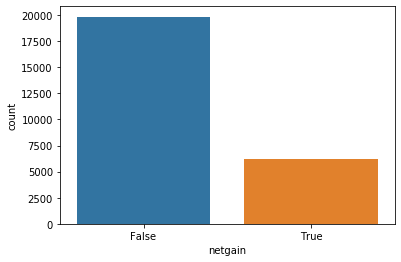

In [59]:
sns.countplot(train.netgain)

Clearly a imabalance problem. Let's analyse earch columns one by one

In [60]:
## Tried using average runtime as categorical -> Didn;t work well

#train['average_runtime(minutes_per_week)'] = pd.cut(
#    train['average_runtime(minutes_per_week)'],[i for i in range(0,101,5)], labels = [i for i in range(20)])

#test['average_runtime(minutes_per_week)'] = pd.cut(
#    test['average_runtime(minutes_per_week)'],[i for i in range(0,101,5)], labels = [i for i in range(20)])

### Relationship

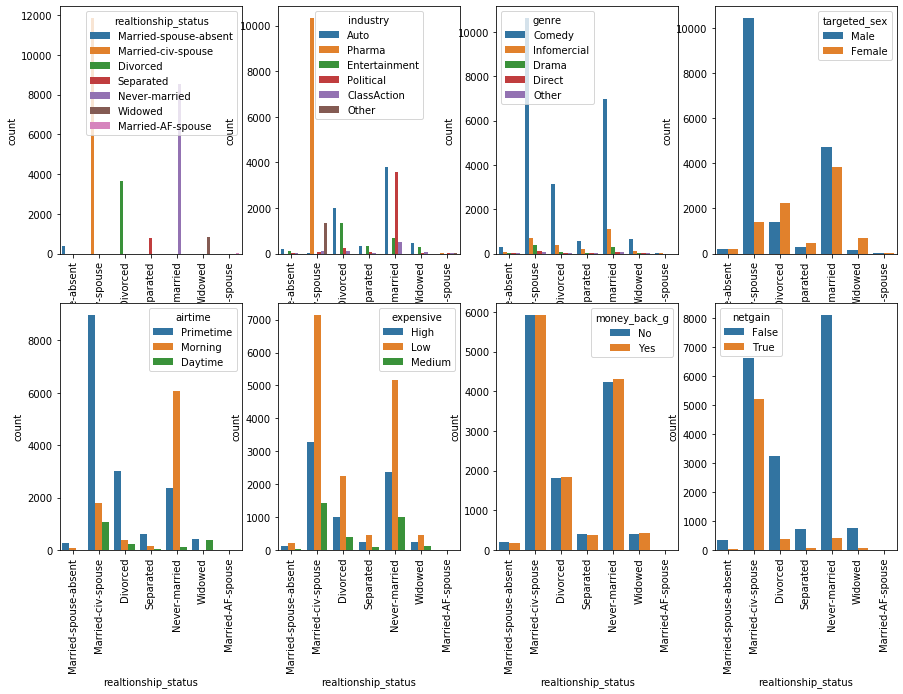

In [61]:
fig, ax = plt.subplots(2,4, figsize=(15,10), sharex = True)
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(2,4,s)
        sns.countplot(train.realtionship_status, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [62]:
## Tried combining Divorced and Seprated entried as both was looking quite same -> Didn't work out
#train.realtionship_status.replace({'Divorced': 'Separated'}, inplace= True)
#test.realtionship_status.replace({'Divorced': 'Separated'}, inplace= True)

In [63]:
# Created feature to check whether person is living together with spouse or not

t = ['Widowed', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse', 'Never-married', 'Divorced']
train['single'] = train.realtionship_status.map(lambda x: 'Yes' if x in t else 'No')
test['single'] = test.realtionship_status.map(lambda x: 'Yes' if x in t else 'No')

### Industry

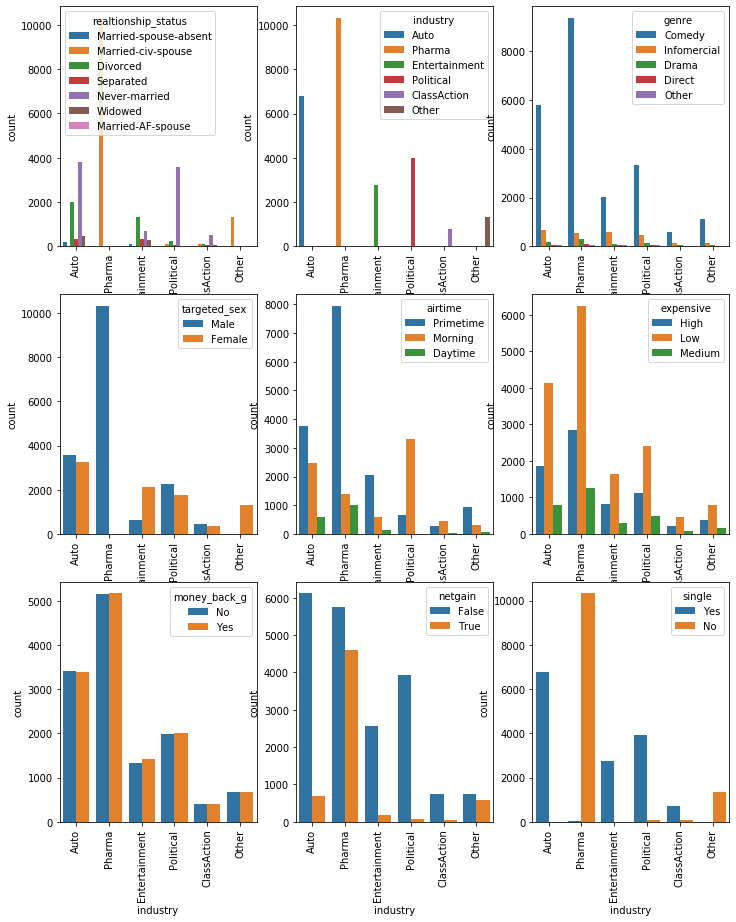

In [64]:
fig, ax = plt.subplots(3,3, figsize=(12,15))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.industry, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [65]:
train.groupby(['industry','expensive'])['netgain'].value_counts()

industry       expensive  netgain
Auto           High       False      1675
                          True        196
               Low        False      3715
                          True        413
               Medium     False       727
                          True         75
ClassAction    High       False       223
                          True          8
               Low        False       449
                          True         29
               Medium     False        81
                          True          4
Entertainment  High       False       770
                          True         61
               Low        False      1529
                          True        107
               Medium     False       279
                          True         19
Other          High       True        193
                          False       190
               Low        False       450
                          True        341
               Medium     False        96


### Genre

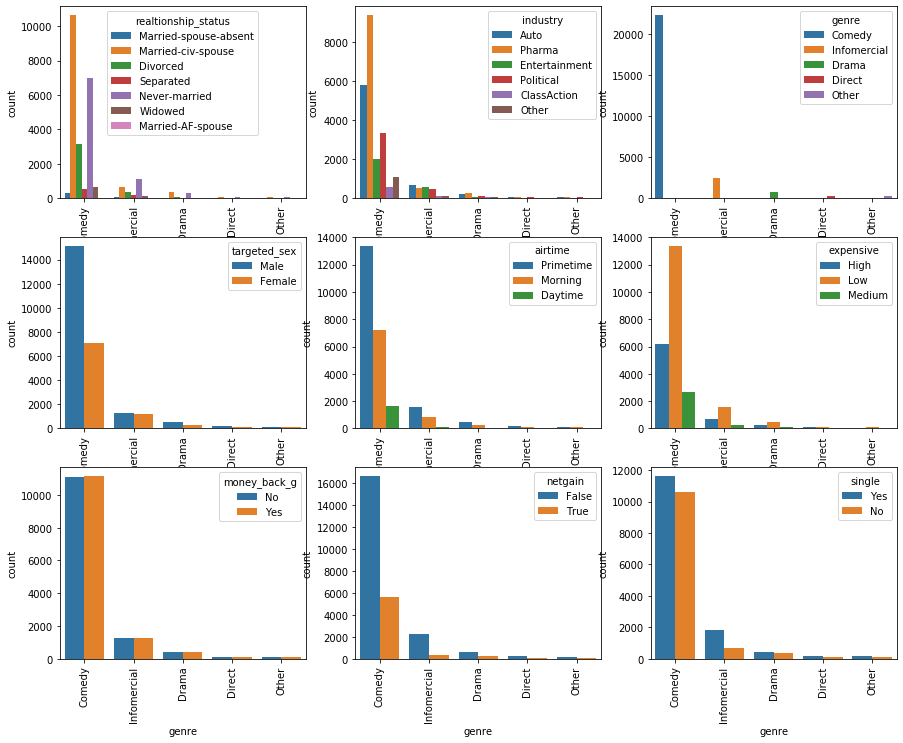

In [66]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.genre, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [67]:
train.head(1)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain,single
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False,Yes


### Target sex

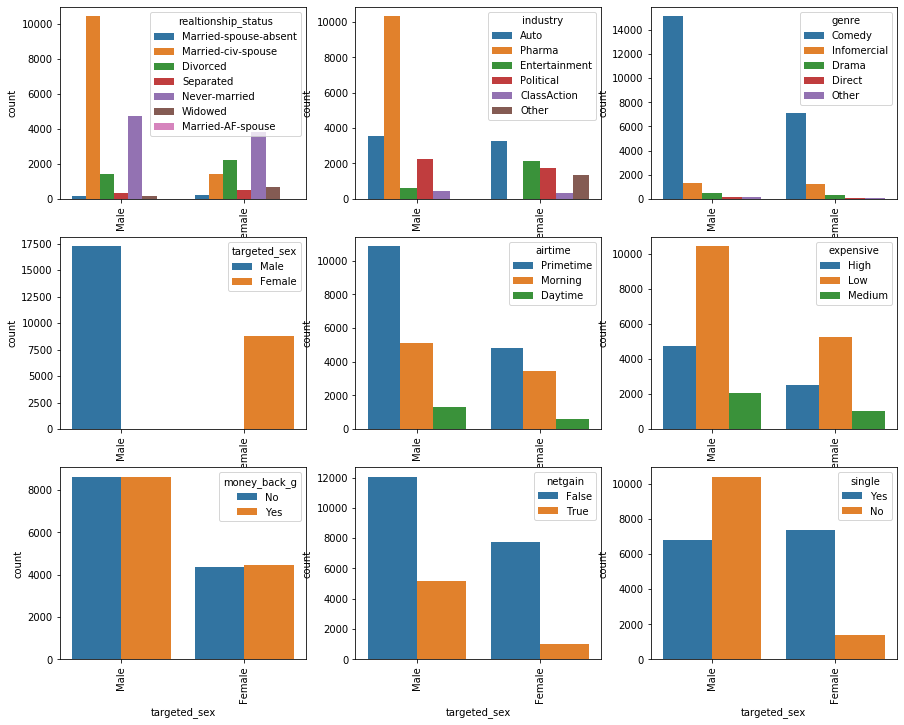

In [68]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.targeted_sex, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

### AirTime

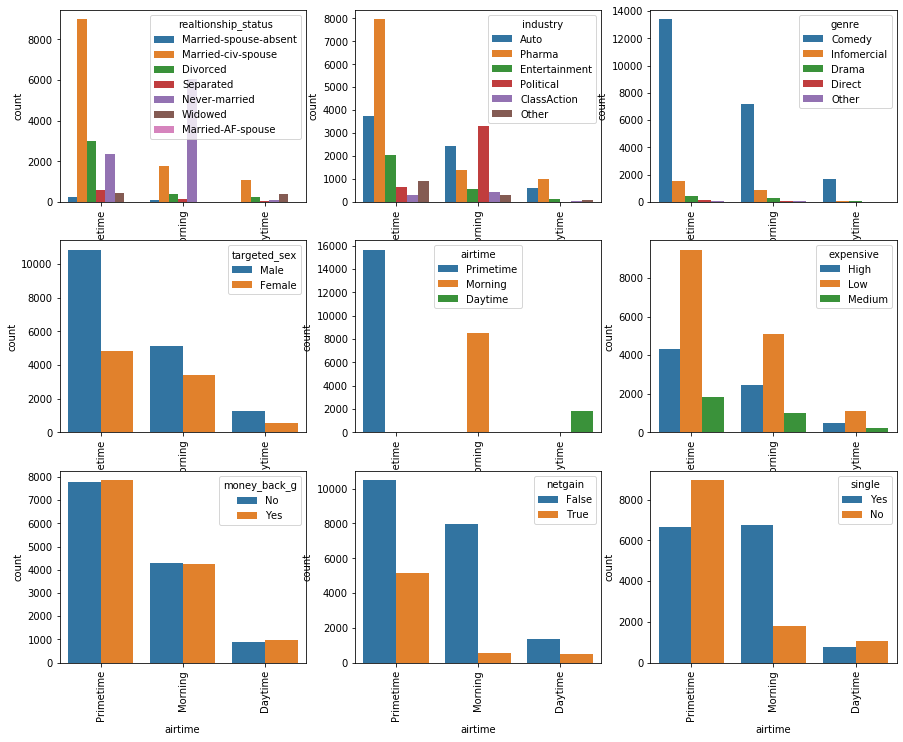

In [69]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.airtime, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [70]:
train.head(1)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain,single
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False,Yes


### Expensive

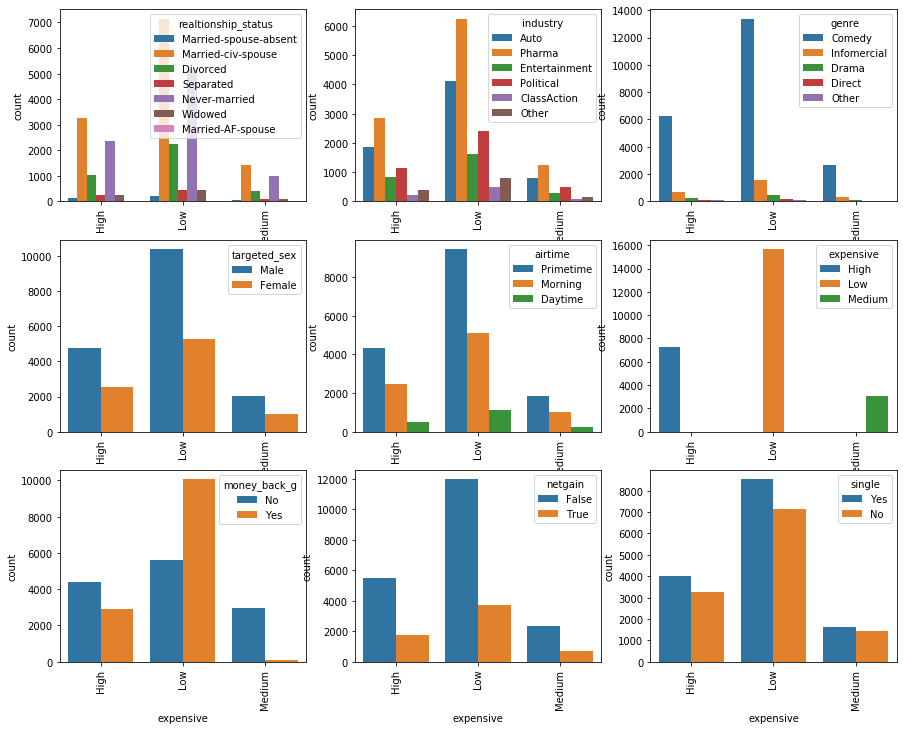

In [71]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.expensive, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

### MoneyBack

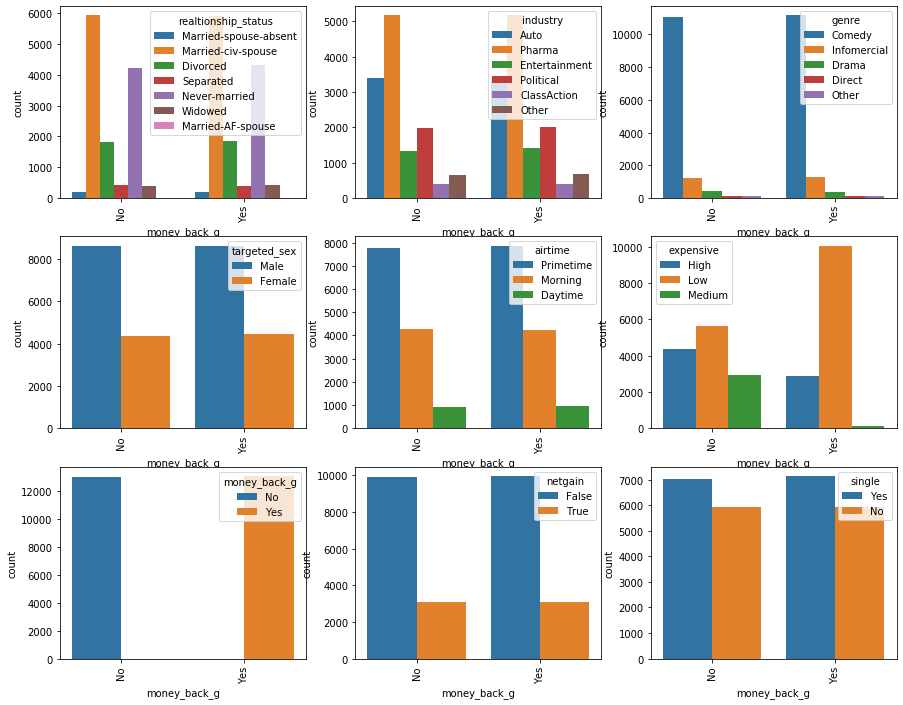

In [72]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.money_back_g, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [73]:
#train.drop(columns = 'money_back_g', inplace=True)
#test.drop(columns = 'money_back_g', inplace=True)

### Netgain

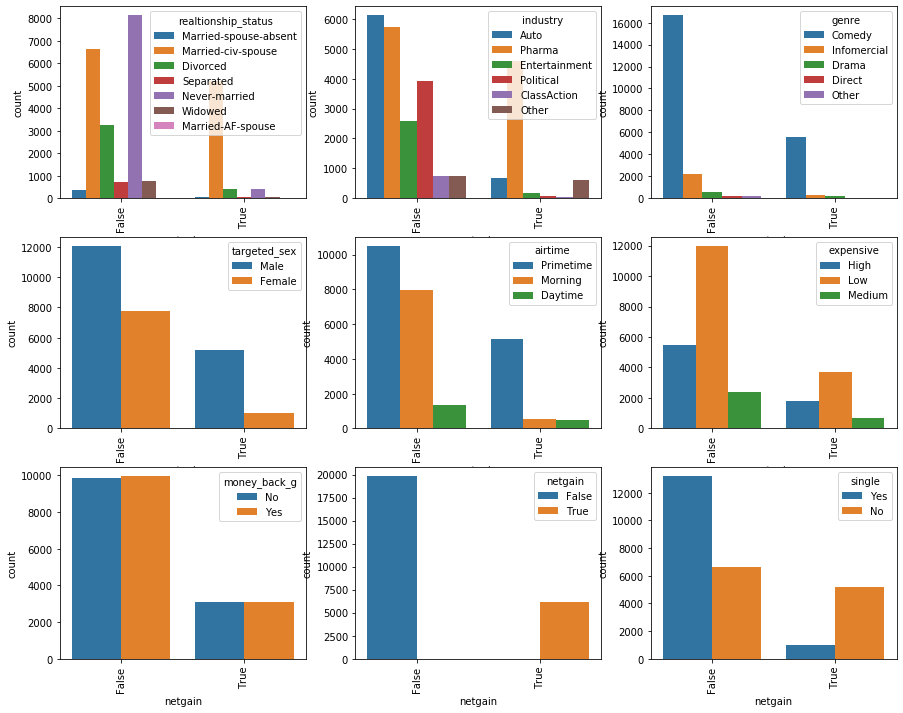

In [74]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.netgain, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

### Single

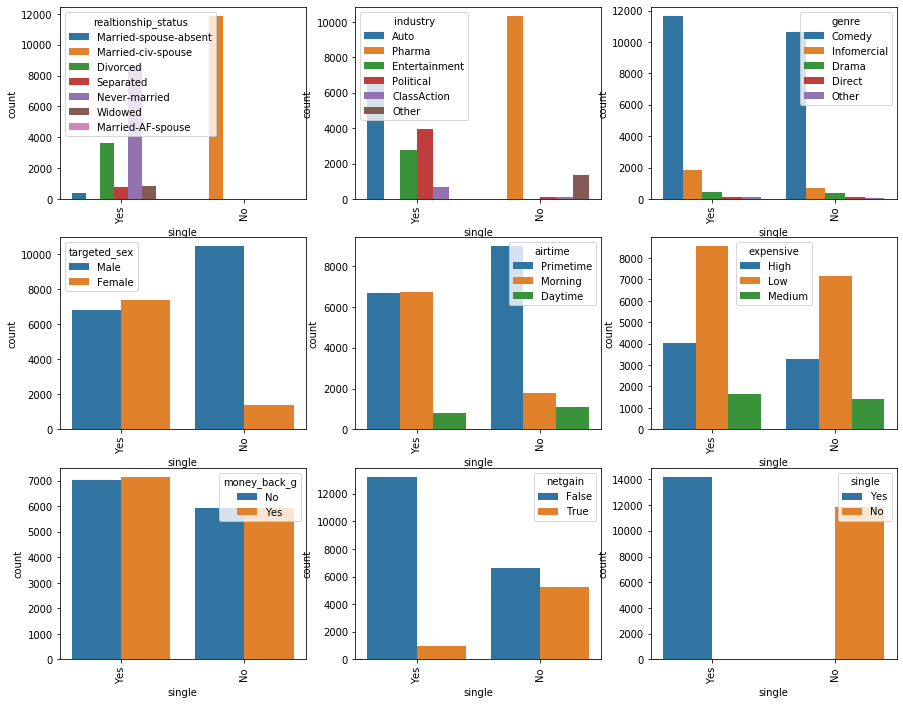

In [75]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.single, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [76]:
train.head(1)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain,single
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False,Yes


###  AirLocation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

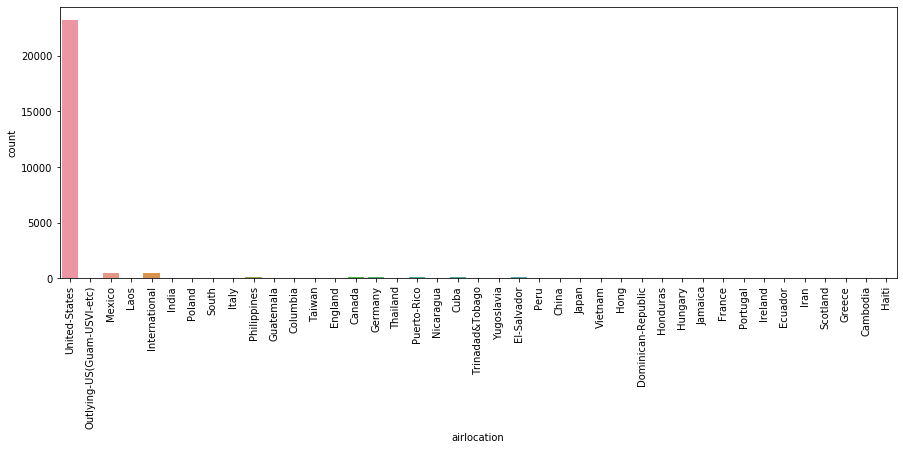

In [77]:
plt.figure(figsize = (15,5))
sns.countplot(train.airlocation)
plt.xticks(rotation = 90)

### Rating

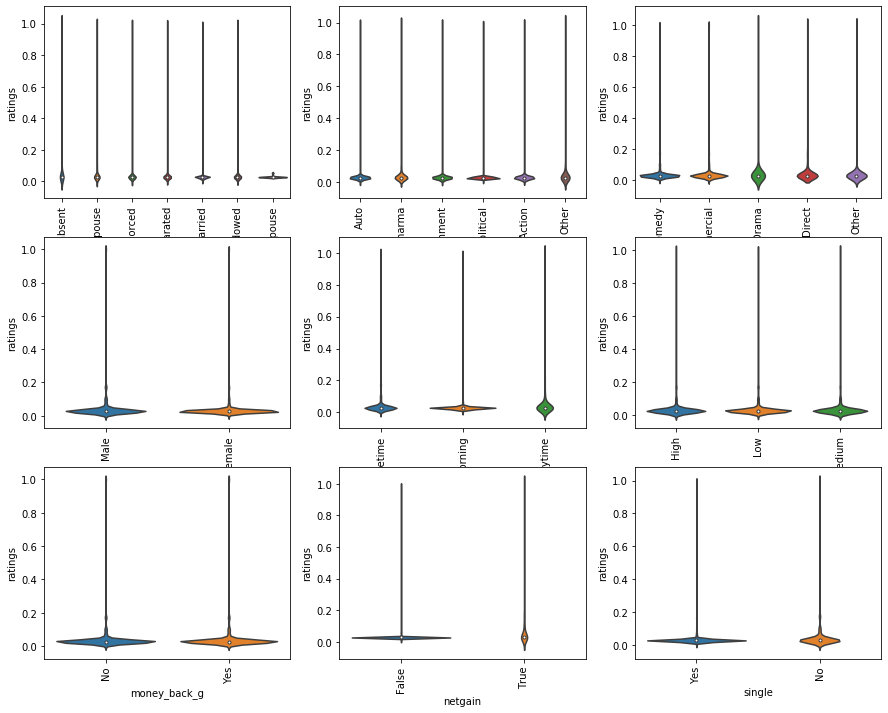

In [78]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.violinplot(y = train.ratings, x = train[i])
        plt.xticks(rotation=90)
        s += 1

## 3. Wrangling with features

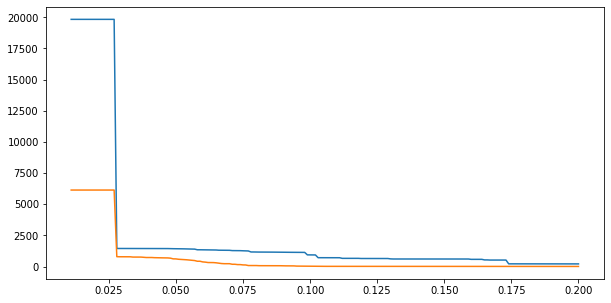

In [79]:
y = []
x = []
plt.figure(figsize = (10,5))
for i in np.arange(0.2,0.01,-0.001):
    y.append(train[train.ratings > i].netgain.value_counts().values)
    x.append(i)
plt.plot(x,y )

In [80]:
train[train.ratings>0.1].netgain.value_counts()

True     930
False     25
Name: netgain, dtype: int64

In [81]:
# Created new feature

train['rating_good'] = train.ratings.apply(lambda x: 'yes' if x>0.1 else 'no')
test['rating_good'] = test.ratings.apply(lambda x: 'yes' if x>0.1 else 'no')

11.370284399919022 139.15088628406068


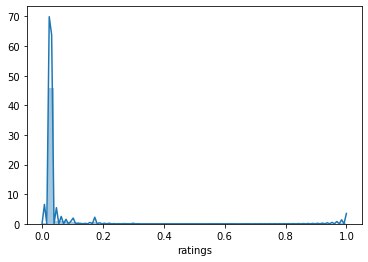

In [82]:
sns.distplot(train.ratings)
print(train.ratings.skew(), train.ratings.kurt())

5.590318000563036 6.564239464295906


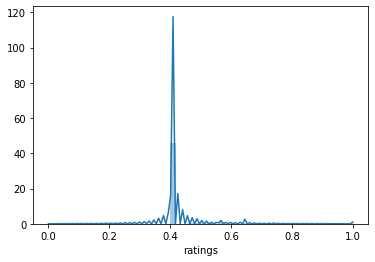

In [83]:
sns.distplot((train.ratings)**(1/4))
print(((train.ratings)**(1/4)).skew(), np.sqrt(((train.ratings)**(1/4)).kurt()))

In [84]:
#train.ratings = (train.ratings)**(1/4)
#test.ratings = (test.ratings)**(1/4)

In [85]:
train.head()

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain,single,rating_good
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False,Yes,no
1,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False,No,no
2,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False,Yes,no
3,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False,Yes,no
4,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True,No,no


### average_runtime(minutes_per_week)

0.27104418228717914 2.996317336755296


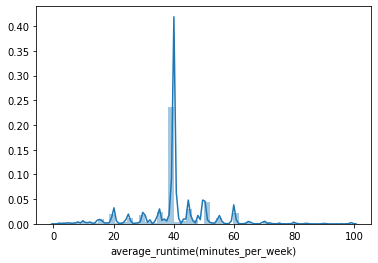

In [86]:
sns.distplot(train['average_runtime(minutes_per_week)'])
print(train['average_runtime(minutes_per_week)'].skew(), train['average_runtime(minutes_per_week)'].kurt())

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26046 entries, 0 to 26045
Data columns (total 13 columns):
realtionship_status                  26046 non-null object
industry                             26046 non-null object
genre                                26046 non-null object
targeted_sex                         26046 non-null object
average_runtime(minutes_per_week)    26046 non-null int64
airtime                              26046 non-null object
airlocation                          26046 non-null object
ratings                              26046 non-null float64
expensive                            26046 non-null object
money_back_g                         26046 non-null object
netgain                              26046 non-null bool
single                               26046 non-null object
rating_good                          26046 non-null object
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 2.4+ MB


In [88]:
train.realtionship_status = train.realtionship_status.astype('category')
train.industry = train.industry.astype('category')
train.genre = train.genre.astype('category')
train.targeted_sex = train.targeted_sex.astype('category')
train.airtime = train.airtime.astype('category')
train.expensive = train.expensive.astype('category')
train.money_back_g = train.money_back_g.astype('category')
train.single = train.single.astype('category')
train['average_runtime(minutes_per_week)'] = train['average_runtime(minutes_per_week)'].astype('float')
train.airlocation = train.airlocation.astype('category')

test.airlocation = test.airlocation.astype('category')
test['average_runtime(minutes_per_week)'] = test['average_runtime(minutes_per_week)'].astype('float')
test.single = test.single.astype('category')
test.realtionship_status = test.realtionship_status.astype('category')
test.industry = test.industry.astype('category')
test.genre = test.genre.astype('category')
test.targeted_sex = test.targeted_sex.astype('category')
test.airtime = test.airtime.astype('category')
test.expensive = test.expensive.astype('category')
test.money_back_g = test.money_back_g.astype('category')

#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#train.airlocation = le.fit_transform(train.airlocation)
#test.airlocation = le.transform(test.airlocation)

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26046 entries, 0 to 26045
Data columns (total 13 columns):
realtionship_status                  26046 non-null category
industry                             26046 non-null category
genre                                26046 non-null category
targeted_sex                         26046 non-null category
average_runtime(minutes_per_week)    26046 non-null float64
airtime                              26046 non-null category
airlocation                          26046 non-null category
ratings                              26046 non-null float64
expensive                            26046 non-null category
money_back_g                         26046 non-null category
netgain                              26046 non-null bool
single                               26046 non-null category
rating_good                          26046 non-null object
dtypes: bool(1), category(9), float64(2), object(1)
memory usage: 867.8+ KB


In [90]:
train_label = train.netgain
train.drop(columns = 'netgain', inplace=True)

In [91]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first= True)

In [92]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
train = pd.DataFrame(mm.fit_transform(train), columns = train.columns)
test = pd.DataFrame(mm.transform(test), columns = test.columns)

In [93]:
train.shape , test.shape

((26046, 65), (6513, 65))

Since target class is unbalanced therefore implemented TOmekLink to remove some majority class values from class boundary

In [94]:
%%time
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
#sm = SMOTE(ratio='minority')
#sm = SMOTETomek(ratio='auto')
sm = TomekLinks(ratio='majority')
x,y = sm.fit_sample(train, train_label)

Wall time: 51.9 s


In [95]:
train = pd.DataFrame(x, columns = train.columns)
train_label = pd.Series(y, name='netgain')

In [96]:
train.shape, train_label.shape

((25800, 65), (25800,))

## 4. Feature Selection

In [97]:
%%time
from sklearn.feature_selection import chi2, SelectKBest, SelectFromModel, RFE
best_1 = SelectKBest(chi2, k=50)
best_1.fit(train, train_label)

from sklearn.linear_model import LogisticRegression
best_2 = RFE(LogisticRegression(), n_features_to_select=50)
best_2.fit(train, train_label)

from sklearn.ensemble import RandomForestClassifier
best_3 = SelectFromModel(RandomForestClassifier(), threshold= '1.25 *median')
best_3.fit(train, train_label)

import lightgbm as lgb
best_4 = SelectFromModel(lgb.LGBMClassifier(), max_features=50)
best_4.fit(train, train_label)

import xgboost as xgb
best_5= SelectFromModel(xgb.XGBClassifier(), max_features=50)
best_5.fit(train, train_label)

best = pd.DataFrame({'Chi2': best_1.get_support(), 'K_Best': best_2.get_support(), 'RF': best_3.get_support(),
              'LGB': best_4.get_support(), 'XGB': best_5.get_support()})
best.head(1)

Wall time: 23.8 s


,Chi2,K_Best,RF,LGB,XGB
0,True,True,True,True,True


In [98]:
np.sum(best, axis = 1).value_counts()

2    23
1    14
3    10
5     8
4     7
0     3
dtype: int64

In [99]:
best.index = train.columns

In [100]:
best.head()

,Chi2,K_Best,RF,LGB,XGB
average_runtime(minutes_per_week),True,True,True,True,True
ratings,True,True,True,True,True
realtionship_status_Married-AF-spouse,True,True,False,False,False
realtionship_status_Married-civ-spouse,True,False,True,True,True
realtionship_status_Married-spouse-absent,True,True,True,False,False


In [101]:
x = best[np.sum(best, axis = 1)<2].index
train.drop(columns=x, inplace= True)
test.drop(columns=x, inplace=True)

In [102]:
train.shape, test.shape

((25800, 48), (6513, 48))

## Modeling

In [103]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, accuracy_score, confusion_matrix, precision_recall_curve,classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn.utils import shuffle

In [104]:
def folds(train, label, model, xg_boost = None, lg_boost = None, param = None, testset = None):
    predicted = pd.DataFrame(np.zeros(len(label)))
    predicted.columns = ['Answer']
    
    predicted_prob = pd.DataFrame(np.zeros(shape=(len(label),2)))
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)
    for t_ind, v_ind in kfold.split(train.values, label.values):
        xtrain , ytrain = train.loc[t_ind,:], label[t_ind]
        xval , yval = train.loc[v_ind,:], label[v_ind]
        
        if xg_boost is not None :
            training = xgb.DMatrix(xtrain, ytrain)
            testing = xgb.DMatrix(xval, yval)
            model = xgb.train(param , training, evals = [(training, 'training'),(testing, 'testing')],
                             num_boost_round = 7000, early_stopping_rounds = 600, verbose_eval = 5)
            predicted.loc[v_ind,'Answer'] = model.predict(testing, ntree_limit= model.best_ntree_limit)
        
        elif lg_boost is not None :
            training = lgb.Dataset(xtrain, ytrain)
            testing = lgb.Dataset(xval, yval, reference=training)
            model = lgb.train(param , training, valid_sets = [training,testing],
                             num_boost_round = 7000, early_stopping_rounds = 600, verbose_eval = 5)
            predicted.loc[v_ind,'Answer'] = model.predict(xval, best_iteration= model.best_iteration)
        
        else :
            model.fit(xtrain, ytrain)
            predicted.loc[v_ind,'Answer'] = model.predict(xval)
            predicted_prob.loc[v_ind] = model.predict_proba(xval)
    
    if xg_boost is not None or lg_boost is not None :
        fig, ax = plt.subplots(2,2,figsize=(14,8))
        precision , recall, threshold = precision_recall_curve(label, predicted)
        plt.subplot(2,2,1)
        plt.plot(precision, recall, 'g--')
        plt.title('F1 score : %s' %f1_score(label, np.where(predicted > 0.5 ,1 ,0)))
        plt.xlabel('Precision')
        plt.ylabel('Precision')

        fpr, tpr, threshold = roc_curve(label, predicted)
        plt.subplot(2,2,2)
        plt.plot(fpr, tpr,'b--')
        plt.title('AUC score : %s' %auc(fpr,tpr))
        print(confusion_matrix(label, np.where(predicted > 0.5 ,1 ,0)))
        print('Accuracy is %s' %accuracy_score(label, np.where(predicted > 0.5 ,1 ,0)))
        print('Matrix %s' %classification_report(label, np.where(predicted > 0.5 ,1 ,0)))
        
        acc = []
        f1 = []
        x = []
        for i in np.arange(0.30,0.70,0.02):
            f1.append(f1_score(np.where(predicted >= i , True, False), label))
            acc.append(accuracy_score(label, np.where(predicted >= i, True, False)))
            x.append(i)
        plt.subplot(2,2,3)
        plt.plot(x,f1)
        plt.plot(x,acc)
        plt.legend(['F1_score','Accuracy'])
        
        if xg_boost is not None:
            xgb.plot_importance(model)
        else:
            lgb.plot_importance(model)
        
    else :
        fig, ax = plt.subplots(2,2,figsize=(15,8))
        precision , recall, threshold = precision_recall_curve(label, predicted_prob.iloc[:,1])
        plt.subplot(2,2,1)
        plt.plot(precision, recall, 'g--')
        plt.title('F1 score : %s' %f1_score(label, predicted))
        plt.xlabel('Precision')
        plt.ylabel('Recall')

        fpr, tpr, threshold = roc_curve(label, predicted_prob.iloc[:,1])
        plt.subplot(2,2,2)
        plt.plot(fpr, tpr,'b--')
        plt.title('AUC score : %s' %auc(fpr,tpr))
        print(confusion_matrix(label, predicted))
        print('Accuracy is %s' %accuracy_score(label, predicted))
        print('Matrix %s' %classification_report(label, predicted))
        
        acc = []
        f1 = []
        x = []
        for i in np.arange(0.30,0.70,0.02):
            f1.append(f1_score(np.where(predicted_prob.iloc[:,1] >= i , True, False), label))
            acc.append(accuracy_score(label, np.where(predicted_prob.iloc[:,1] >= i, True, False)))
            x.append(i)
        plt.subplot(2,2,3)
        plt.plot(x,f1)
        plt.plot(x,acc)
        plt.legend(['F1_score','Accuracy'])
    if xg_boost is not None :
        df = model.predict(xgb.DMatrix(testset), ntree_limit= model.best_ntree_limit)
    elif lg_boost is not None :
        df = model.predict(testset, best_iteration = model.best_iteration)
    else:
        df = model.predict(testset)
    return(df)

In [105]:
def cv_style(train, label, model = None, test = None):
    df = pd.concat([train, label], axis =1)
    
    df_False = df[df.netgain == False]
    df_True = df[df.netgain == True]
    
    prediction_train = pd.DataFrame(np.eye(len(train.index),3))
    prediction_train.columns = [i for i in range(3)]
    prediction_test = pd.DataFrame(np.eye(6513,3))
    prediction_test.columns = [i for i in range(3)]
    
    for i,batch in enumerate(np.array_split(df_False, 3)):
        batch = pd.concat([df_False, df_True], axis = 0)
        batch = shuffle(batch)
        model.fit(batch.drop(columns = 'netgain'), batch.netgain)
    
        prediction_train.iloc[:,i] = model.predict(batch.drop(columns = 'netgain'))
        prediction_test.iloc[:,i] = model.predict(test)
    return(prediction_train, prediction_test)

### Logistic Reg

[[14452  5153]
 [ 1035  5160]]
Accuracy is 0.7601550387596899
Matrix               precision    recall  f1-score   support

       False       0.93      0.74      0.82     19605
        True       0.50      0.83      0.63      6195

    accuracy                           0.76     25800
   macro avg       0.72      0.79      0.72     25800
weighted avg       0.83      0.76      0.78     25800

0.5533333333333333
0.5496124031007752
0.5533333333333333


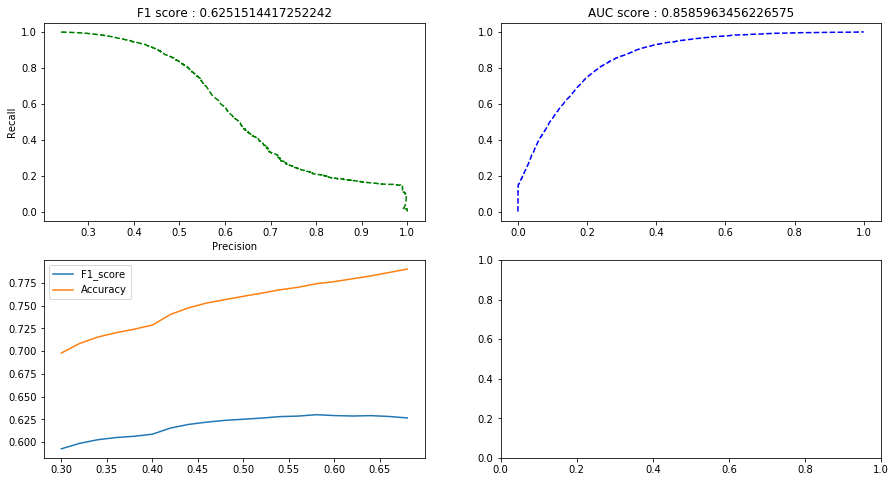

In [106]:
lg = LogisticRegression(class_weight='balanced')
answer = folds(train, train_label, lg, testset = test)

df_train, df_test = cv_style(train, train_label, lg, test)
for i in range(3):
    print(accuracy_score(df_train[i], train_label))

### SGD Classifier

In [107]:
#sgd = SGDClassifier(tol = 1e-8, loss = 'huber')
#folds(train, train_label, sgd)

### DecisionTree

[[17836  1769]
 [ 3411  2784]]
Accuracy is 0.7992248062015503
Matrix               precision    recall  f1-score   support

       False       0.84      0.91      0.87     19605
        True       0.61      0.45      0.52      6195

    accuracy                           0.80     25800
   macro avg       0.73      0.68      0.70     25800
weighted avg       0.78      0.80      0.79     25800

0.6678294573643411
0.6648837209302325
0.666046511627907


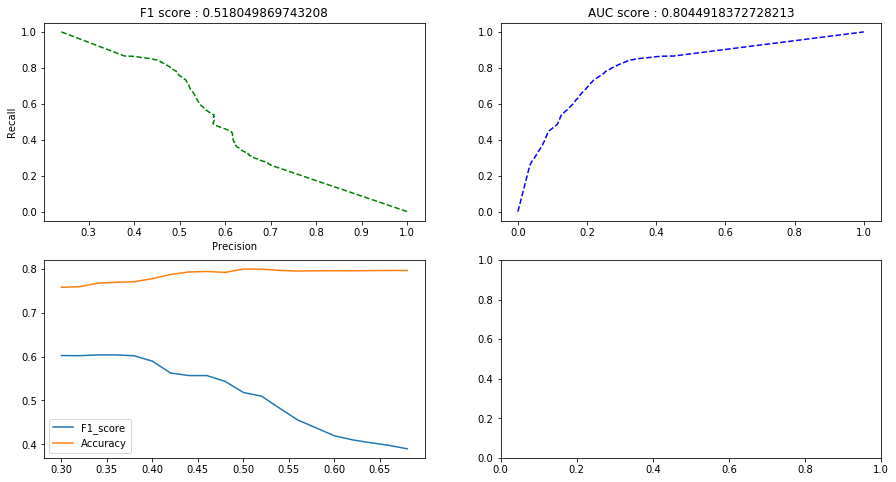

In [108]:
dtc = DecisionTreeClassifier()
folds(train, train_label, dtc, testset = test)

df_train, df_test = cv_style(train, train_label, dtc, test )
for i in range(3):
    print(accuracy_score(df_train[i], train_label))

### SVC

In [109]:
#svc = SVC(probability=True)
#folds(train, train_label, svc)

### RandomForest

[[18013  1592]
 [ 3337  2858]]
Accuracy is 0.808953488372093
Matrix               precision    recall  f1-score   support

       False       0.84      0.92      0.88     19605
        True       0.64      0.46      0.54      6195

    accuracy                           0.81     25800
   macro avg       0.74      0.69      0.71     25800
weighted avg       0.80      0.81      0.80     25800

0.6603875968992248
0.6629457364341085
0.665891472868217


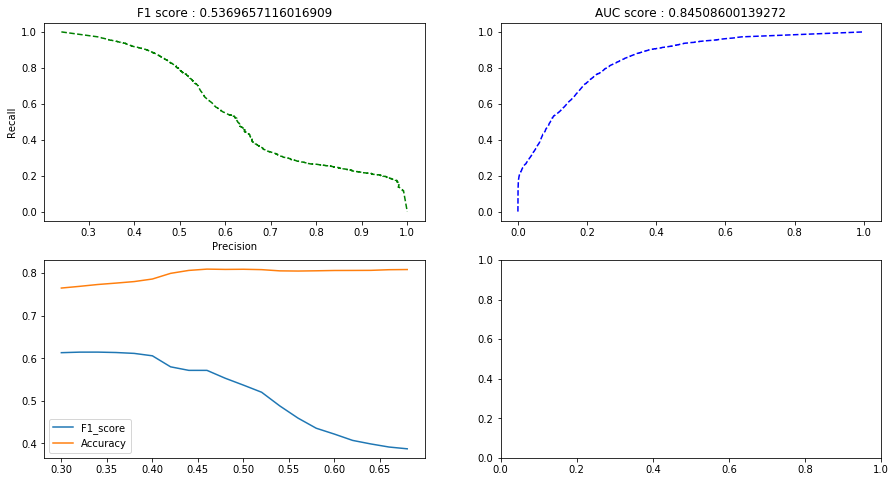

In [110]:
rf = RandomForestClassifier(n_estimators=100)
folds(train, train_label, rf, testset = test)

df_train, df_test = cv_style(train, train_label, rf, test)
for i in range(3):
    print(accuracy_score(df_train[i], train_label))

In [111]:
pd.Series(rf.feature_importances_, index = train.columns).sort_values(ascending=False)

average_runtime(minutes_per_week)            0.192605
ratings                                      0.182897
realtionship_status_Married-civ-spouse       0.094529
single_Yes                                   0.083600
rating_good_yes                              0.077134
industry_Pharma                              0.064835
realtionship_status_Never-married            0.039239
airtime_Morning                              0.038317
airtime_Primetime                            0.034312
money_back_g_Yes                             0.019642
expensive_Low                                0.018292
targeted_sex_Male                            0.018253
industry_Political                           0.012286
genre_Infomercial                            0.011947
industry_Other                               0.011679
industry_Entertainment                       0.011234
expensive_Medium                             0.010835
airlocation_United-States                    0.010341
airlocation_Mexico          

from bayes_opt import BayesianOptimization

def optim(train, label, n_init = 20, n_opt = 10, n_estimators = 897, learning_rate = 0.005, random_state = 2019):
    training = lgb.Dataset(train, label)
    def op(num_leaves, lambda_l1, lambda_l2, bagging_fraction, feature_fraction, min_gain_split, min_child_weight):
        param = {}
        param['learning_rate'] = learning_rate
        param['application'] = 'binary'
        param['metrics'] = 'auc'
        param['n_estimators'] = n_estimators
        param['random_state'] = random_state
        param['num_leaves'] = int(round(num_leaves))
        param['lambda_l1'] = max(lambda_l1, 0) 
        param['lambda_l2'] = max(lambda_l2, 0)
        param['bagging_fraction'] = min(max(bagging_fraction,0),1)
        param['feature_fraction'] = min(max(feature_fraction,0),1)
        param['min_gain_split'] = min_gain_split
        param['max_depth'] = -1
        param['min_child_weight'] = min_child_weight
        
        output = lgb.cv(param, training, nfold=5, metrics=['auc'], num_boost_round=7000, early_stopping_rounds=600, 
                        stratified=True)
        return(max(output['auc-mean']))
    
    baye = BayesianOptimization(op, {'num_leaves':(2,100), 'lambda_l1':(0,1), 'lambda_l2':(0,4),
                                     'bagging_fraction':(0,1), 'feature_fraction':(0,1),
                                     'min_gain_split':(0.0001, 0.01), 'min_child_weight':(2,31)})
    
    baye.maximize(init_points=n_init, n_iter=n_opt)
    return(baye)
x = optim(train, train_label)

### LGB

Training until validation scores don't improve for 600 rounds
[5]	training's auc: 0.868121	valid_1's auc: 0.862771
[10]	training's auc: 0.868247	valid_1's auc: 0.862701
[15]	training's auc: 0.868315	valid_1's auc: 0.862639
[20]	training's auc: 0.868482	valid_1's auc: 0.862989
[25]	training's auc: 0.86879	valid_1's auc: 0.863523
[30]	training's auc: 0.868707	valid_1's auc: 0.863407
[35]	training's auc: 0.868876	valid_1's auc: 0.863601
[40]	training's auc: 0.868737	valid_1's auc: 0.863368
[45]	training's auc: 0.868894	valid_1's auc: 0.863543
[50]	training's auc: 0.869161	valid_1's auc: 0.863586
[55]	training's auc: 0.869231	valid_1's auc: 0.863736
[60]	training's auc: 0.869312	valid_1's auc: 0.863577
[65]	training's auc: 0.8692	valid_1's auc: 0.863497
[70]	training's auc: 0.869237	valid_1's auc: 0.863343
[75]	training's auc: 0.869108	valid_1's auc: 0.863061
[80]	training's auc: 0.869516	valid_1's auc: 0.862972
[85]	training's auc: 0.869581	valid_1's auc: 0.863012
[90]	training's auc: 0.8

[770]	training's auc: 0.879466	valid_1's auc: 0.867825
[775]	training's auc: 0.87952	valid_1's auc: 0.867838
[780]	training's auc: 0.87967	valid_1's auc: 0.867977
[785]	training's auc: 0.879745	valid_1's auc: 0.868007
[790]	training's auc: 0.879809	valid_1's auc: 0.868054
[795]	training's auc: 0.879869	valid_1's auc: 0.868115
[800]	training's auc: 0.879927	valid_1's auc: 0.868186
[805]	training's auc: 0.879973	valid_1's auc: 0.868265
[810]	training's auc: 0.880005	valid_1's auc: 0.868258
[815]	training's auc: 0.880117	valid_1's auc: 0.868327
[820]	training's auc: 0.880141	valid_1's auc: 0.868314
[825]	training's auc: 0.880184	valid_1's auc: 0.868455
[830]	training's auc: 0.880247	valid_1's auc: 0.868435
[835]	training's auc: 0.880307	valid_1's auc: 0.86855
[840]	training's auc: 0.880351	valid_1's auc: 0.868699
[845]	training's auc: 0.880417	valid_1's auc: 0.868746
[850]	training's auc: 0.880481	valid_1's auc: 0.868754
[855]	training's auc: 0.880517	valid_1's auc: 0.868801
[860]	trainin

[1525]	training's auc: 0.886894	valid_1's auc: 0.868072
[1530]	training's auc: 0.886937	valid_1's auc: 0.868058
[1535]	training's auc: 0.886973	valid_1's auc: 0.868031
[1540]	training's auc: 0.887018	valid_1's auc: 0.868071
[1545]	training's auc: 0.887052	valid_1's auc: 0.868079
[1550]	training's auc: 0.887077	valid_1's auc: 0.86813
[1555]	training's auc: 0.887114	valid_1's auc: 0.868122
[1560]	training's auc: 0.887141	valid_1's auc: 0.868084
[1565]	training's auc: 0.88718	valid_1's auc: 0.868137
[1570]	training's auc: 0.887205	valid_1's auc: 0.868137
[1575]	training's auc: 0.887246	valid_1's auc: 0.868129
[1580]	training's auc: 0.887284	valid_1's auc: 0.868144
[1585]	training's auc: 0.887318	valid_1's auc: 0.868133
Early stopping, best iteration is:
[987]	training's auc: 0.881996	valid_1's auc: 0.869245
Training until validation scores don't improve for 600 rounds
[5]	training's auc: 0.867483	valid_1's auc: 0.863939
[10]	training's auc: 0.867524	valid_1's auc: 0.863898
[15]	training's

[670]	training's auc: 0.87844	valid_1's auc: 0.86851
[675]	training's auc: 0.878465	valid_1's auc: 0.868503
[680]	training's auc: 0.878538	valid_1's auc: 0.868497
[685]	training's auc: 0.878551	valid_1's auc: 0.868497
[690]	training's auc: 0.878597	valid_1's auc: 0.868522
[695]	training's auc: 0.878632	valid_1's auc: 0.868509
[700]	training's auc: 0.878664	valid_1's auc: 0.868503
[705]	training's auc: 0.878696	valid_1's auc: 0.868487
[710]	training's auc: 0.878758	valid_1's auc: 0.868489
[715]	training's auc: 0.878809	valid_1's auc: 0.8685
[720]	training's auc: 0.878862	valid_1's auc: 0.868495
[725]	training's auc: 0.878902	valid_1's auc: 0.868486
[730]	training's auc: 0.878946	valid_1's auc: 0.868527
[735]	training's auc: 0.879	valid_1's auc: 0.868524
[740]	training's auc: 0.879052	valid_1's auc: 0.868453
[745]	training's auc: 0.879128	valid_1's auc: 0.868413
[750]	training's auc: 0.879191	valid_1's auc: 0.868387
[755]	training's auc: 0.879252	valid_1's auc: 0.868333
[760]	training's 

[160]	training's auc: 0.87243	valid_1's auc: 0.863189
[165]	training's auc: 0.872502	valid_1's auc: 0.863075
[170]	training's auc: 0.872801	valid_1's auc: 0.863152
[175]	training's auc: 0.872985	valid_1's auc: 0.863434
[180]	training's auc: 0.87307	valid_1's auc: 0.863493
[185]	training's auc: 0.873135	valid_1's auc: 0.863575
[190]	training's auc: 0.873128	valid_1's auc: 0.863656
[195]	training's auc: 0.873269	valid_1's auc: 0.863718
[200]	training's auc: 0.873368	valid_1's auc: 0.863658
[205]	training's auc: 0.873492	valid_1's auc: 0.863755
[210]	training's auc: 0.873497	valid_1's auc: 0.863739
[215]	training's auc: 0.873603	valid_1's auc: 0.863786
[220]	training's auc: 0.873673	valid_1's auc: 0.863793
[225]	training's auc: 0.873713	valid_1's auc: 0.863857
[230]	training's auc: 0.873776	valid_1's auc: 0.863884
[235]	training's auc: 0.873837	valid_1's auc: 0.863918
[240]	training's auc: 0.87386	valid_1's auc: 0.863942
[245]	training's auc: 0.873902	valid_1's auc: 0.864028
[250]	trainin

[915]	training's auc: 0.881661	valid_1's auc: 0.865772
[920]	training's auc: 0.881696	valid_1's auc: 0.865749
[925]	training's auc: 0.88176	valid_1's auc: 0.865763
[930]	training's auc: 0.881796	valid_1's auc: 0.865711
[935]	training's auc: 0.881877	valid_1's auc: 0.86571
[940]	training's auc: 0.881939	valid_1's auc: 0.865743
[945]	training's auc: 0.882089	valid_1's auc: 0.865787
[950]	training's auc: 0.882105	valid_1's auc: 0.865863
[955]	training's auc: 0.882159	valid_1's auc: 0.865948
[960]	training's auc: 0.882236	valid_1's auc: 0.866004
[965]	training's auc: 0.882323	valid_1's auc: 0.865995
[970]	training's auc: 0.882383	valid_1's auc: 0.866017
[975]	training's auc: 0.882422	valid_1's auc: 0.865913
[980]	training's auc: 0.882463	valid_1's auc: 0.865948
[985]	training's auc: 0.882574	valid_1's auc: 0.865932
[990]	training's auc: 0.882591	valid_1's auc: 0.865976
[995]	training's auc: 0.882663	valid_1's auc: 0.86597
[1000]	training's auc: 0.882742	valid_1's auc: 0.865952
[1005]	train

[460]	training's auc: 0.87681	valid_1's auc: 0.864038
[465]	training's auc: 0.876828	valid_1's auc: 0.864086
[470]	training's auc: 0.876863	valid_1's auc: 0.864123
[475]	training's auc: 0.876922	valid_1's auc: 0.86415
[480]	training's auc: 0.87698	valid_1's auc: 0.864212
[485]	training's auc: 0.876957	valid_1's auc: 0.864218
[490]	training's auc: 0.877128	valid_1's auc: 0.86457
[495]	training's auc: 0.87727	valid_1's auc: 0.864504
[500]	training's auc: 0.877305	valid_1's auc: 0.864268
[505]	training's auc: 0.877405	valid_1's auc: 0.864479
[510]	training's auc: 0.87747	valid_1's auc: 0.864533
[515]	training's auc: 0.877529	valid_1's auc: 0.864467
[520]	training's auc: 0.877576	valid_1's auc: 0.864617
[525]	training's auc: 0.877581	valid_1's auc: 0.864486
[530]	training's auc: 0.877605	valid_1's auc: 0.864581
[535]	training's auc: 0.877652	valid_1's auc: 0.864547
[540]	training's auc: 0.877687	valid_1's auc: 0.864565
[545]	training's auc: 0.877799	valid_1's auc: 0.864539
[550]	training's

[1200]	training's auc: 0.884003	valid_1's auc: 0.866105
[1205]	training's auc: 0.884053	valid_1's auc: 0.866151
[1210]	training's auc: 0.884091	valid_1's auc: 0.866143
[1215]	training's auc: 0.884119	valid_1's auc: 0.86623
[1220]	training's auc: 0.884165	valid_1's auc: 0.866236
[1225]	training's auc: 0.884196	valid_1's auc: 0.866233
[1230]	training's auc: 0.884229	valid_1's auc: 0.866211
[1235]	training's auc: 0.884271	valid_1's auc: 0.866166
[1240]	training's auc: 0.8843	valid_1's auc: 0.866191
[1245]	training's auc: 0.884347	valid_1's auc: 0.866161
[1250]	training's auc: 0.8844	valid_1's auc: 0.866069
[1255]	training's auc: 0.88444	valid_1's auc: 0.866109
[1260]	training's auc: 0.884497	valid_1's auc: 0.866097
[1265]	training's auc: 0.884538	valid_1's auc: 0.866098
[1270]	training's auc: 0.884581	valid_1's auc: 0.866077
[1275]	training's auc: 0.884611	valid_1's auc: 0.866098
[1280]	training's auc: 0.884641	valid_1's auc: 0.866079
[1285]	training's auc: 0.884668	valid_1's auc: 0.86609

[265]	training's auc: 0.872719	valid_1's auc: 0.871476
[270]	training's auc: 0.872828	valid_1's auc: 0.871587
[275]	training's auc: 0.872892	valid_1's auc: 0.871648
[280]	training's auc: 0.872983	valid_1's auc: 0.871678
[285]	training's auc: 0.87304	valid_1's auc: 0.871759
[290]	training's auc: 0.873093	valid_1's auc: 0.871832
[295]	training's auc: 0.873221	valid_1's auc: 0.871931
[300]	training's auc: 0.87326	valid_1's auc: 0.872194
[305]	training's auc: 0.87328	valid_1's auc: 0.872187
[310]	training's auc: 0.873337	valid_1's auc: 0.872195
[315]	training's auc: 0.873408	valid_1's auc: 0.872306
[320]	training's auc: 0.873446	valid_1's auc: 0.872288
[325]	training's auc: 0.873515	valid_1's auc: 0.872374
[330]	training's auc: 0.873532	valid_1's auc: 0.872417
[335]	training's auc: 0.873576	valid_1's auc: 0.872392
[340]	training's auc: 0.873649	valid_1's auc: 0.872471
[345]	training's auc: 0.873708	valid_1's auc: 0.872562
[350]	training's auc: 0.873737	valid_1's auc: 0.872659
[355]	trainin

[1035]	training's auc: 0.881219	valid_1's auc: 0.873237
[1040]	training's auc: 0.881299	valid_1's auc: 0.873261
[1045]	training's auc: 0.88135	valid_1's auc: 0.87328
[1050]	training's auc: 0.881397	valid_1's auc: 0.87326
[1055]	training's auc: 0.881451	valid_1's auc: 0.873314
[1060]	training's auc: 0.881506	valid_1's auc: 0.873277
[1065]	training's auc: 0.881554	valid_1's auc: 0.873258
[1070]	training's auc: 0.88158	valid_1's auc: 0.87326
[1075]	training's auc: 0.881618	valid_1's auc: 0.873264
[1080]	training's auc: 0.881694	valid_1's auc: 0.873268
[1085]	training's auc: 0.881732	valid_1's auc: 0.873251
[1090]	training's auc: 0.881767	valid_1's auc: 0.873253
[1095]	training's auc: 0.881839	valid_1's auc: 0.873228
[1100]	training's auc: 0.881869	valid_1's auc: 0.873228
[1105]	training's auc: 0.881901	valid_1's auc: 0.873243
[1110]	training's auc: 0.881924	valid_1's auc: 0.873273
[1115]	training's auc: 0.881944	valid_1's auc: 0.873295
[1120]	training's auc: 0.881982	valid_1's auc: 0.8733

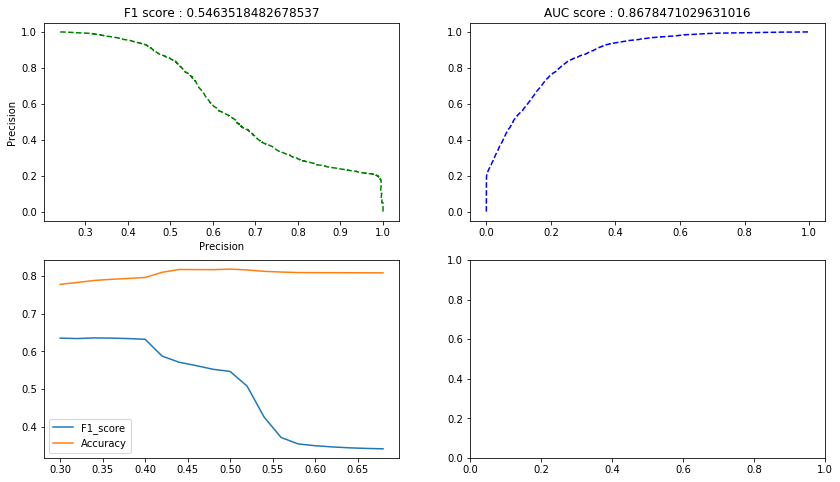

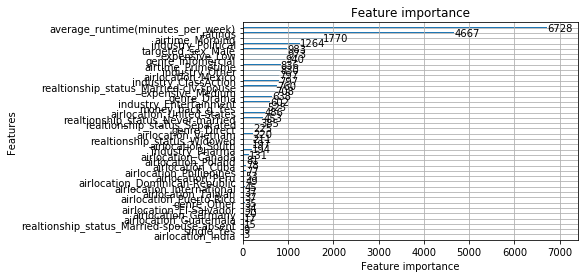

In [112]:
param = dict()
param['objective'] = 'binary'
param['metric'] = 'auc'
param['seed'] = 2019
param['learning_rate'] = 0.005
#xgb.train(num_boost_round=21, eva)
answer = folds(train, train_label, lgb, lg_boost = True, param = param, testset = test)
df_train, df_test = cv_style(train, train_label, lgb.LGBMClassifier(), test)
for i in range(3):
    print(accuracy_score(df_train[i], train_label))

In [113]:
df = pd.Series(np.where(answer>=0.43,True, False))

In [114]:
sample.head()

,id,netgain
0,31820,True
1,10888,True
2,26999,True
3,6912,False
4,10055,False


In [115]:
g = pd.read_csv('Test.csv')
g = pd.DataFrame({'id': g.id, 'netgain': df})

In [116]:
g.to_csv('Final_answer.csv', index= False)

In [117]:
g.head()

,id,netgain
0,1,False
1,4,False
2,5,False
3,9,False
4,10,False


In [118]:
g.netgain.value_counts()

False    5059
True     1454
Name: netgain, dtype: int64